## Import dependencies

In [3]:
# Import pandas
import pandas as pd

# Import torch
import torch

# Import torchvision
import torchvision

# Check versions
print(torch.__version__)
print(torchvision.__version__)

# Check GPU
if torch.backends.mps.is_available():
    DEVICE = torch.device("mps")
    x = torch.ones(1, device=DEVICE)
    print(x)
else:
    print ("MPS device not found.")

1.13.1
0.14.1


/Users/blakedickerson/anaconda3/lib/python3.9/site-packages/torch/_tensor_str.py:115: UserWarning: The operator 'aten::nonzero' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1670525849783/work/aten/src/ATen/mps/MPSFallback.mm:11.)
  nonzero_finite_vals = torch.masked_select(


tensor([1.], device='mps:0')


## Data Exploration

In [10]:
# Import OS
import os

In [21]:
DIR_PATH = "/Users/blakedickerson/anaconda3/CitrusHack/citrushackandcustom-1"
TRAIN_IMG_PATH = DIR_PATH + "/train/images/"
TRAIN_LABEL_PATH = DIR_PATH + "/train/labels/"
TEST_IMG_PATH = DIR_PATH + "/test/images/"
TEST_LABEL_PATH = DIR_PATH + "/test/labels/"
VAL_IMG_PATH = DIR_PATH + "/valid/images/"
VAL_LABEL_PATH = DIR_PATH + "/valid/labels/"

In [18]:
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

print("Walking through dir path...")
walk_through_dir(DIR_PATH)

Walking through dir path...
There are 3 directories and 4 images in '/Users/blakedickerson/anaconda3/CitrusHack/citrushackandcustom-1'.
There are 2 directories and 0 images in '/Users/blakedickerson/anaconda3/CitrusHack/citrushackandcustom-1/valid'.
There are 0 directories and 225 images in '/Users/blakedickerson/anaconda3/CitrusHack/citrushackandcustom-1/valid/images'.
There are 0 directories and 225 images in '/Users/blakedickerson/anaconda3/CitrusHack/citrushackandcustom-1/valid/labels'.
There are 2 directories and 1 images in '/Users/blakedickerson/anaconda3/CitrusHack/citrushackandcustom-1/test'.
There are 0 directories and 150 images in '/Users/blakedickerson/anaconda3/CitrusHack/citrushackandcustom-1/test/images'.
There are 0 directories and 150 images in '/Users/blakedickerson/anaconda3/CitrusHack/citrushackandcustom-1/test/labels'.
There are 2 directories and 1 images in '/Users/blakedickerson/anaconda3/CitrusHack/citrushackandcustom-1/train'.
There are 0 directories and 3405 

In [22]:
print("Walking through train image path...")
walk_through_dir(TRAIN_IMG_PATH)
print("Walking through train label path...")
walk_through_dir(TRAIN_LABEL_PATH)

Walking through train image path...
There are 0 directories and 3405 images in '/Users/blakedickerson/anaconda3/CitrusHack/citrushackandcustom-1/train/images/'.
Walking through train label path...
There are 0 directories and 3405 images in '/Users/blakedickerson/anaconda3/CitrusHack/citrushackandcustom-1/train/labels/'.


**We see that we have 3405 images corresponding with 3405 labels, which is exactly what we want to see**

In [36]:
print("Walking through test image path...")
walk_through_dir(TEST_IMG_PATH)
print("Walking through test label path...")
walk_through_dir(TEST_LABEL_PATH)

Walking through test image path...
There are 0 directories and 150 images in '/Users/blakedickerson/anaconda3/CitrusHack/citrushackandcustom-1/test/images/'.
Walking through test label path...
There are 0 directories and 150 images in '/Users/blakedickerson/anaconda3/CitrusHack/citrushackandcustom-1/test/labels/'.


In [37]:
print("Walking through val image path...")
walk_through_dir(VAL_IMG_PATH)
print("Walking through val label path...")
walk_through_dir(VAL_LABEL_PATH)

Walking through val image path...
There are 0 directories and 225 images in '/Users/blakedickerson/anaconda3/CitrusHack/citrushackandcustom-1/valid/images/'.
Walking through val label path...
There are 0 directories and 225 images in '/Users/blakedickerson/anaconda3/CitrusHack/citrushackandcustom-1/valid/labels/'.


**It looks like we have a total of 3,780 images and 3,780 labels. The split size is 90% train, 4% test, 6% val.**

Random image path: /Users/blakedickerson/anaconda3/CitrusHack/citrushackandcustom-1/train/images/000087_jpg.rf.face88afab523694e1168e7936c3d00b.jpg


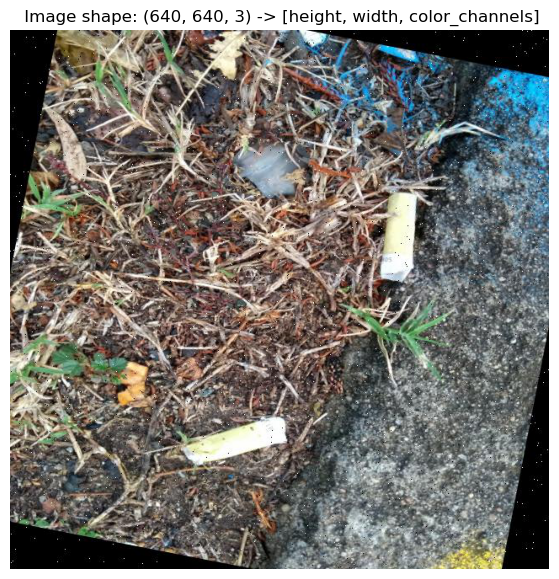

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Import random
import random

# Import Image
from PIL import Image

# Import Path
from pathlib import Path

# Set seed so we see the same image every time for replication
random.seed(24)

TRAIN_IMG_PATH_TO_PATH = Path(DIR_PATH) / "train" / "images"

image_path_list = list(TRAIN_IMG_PATH_TO_PATH.glob("**/*.jpg"))

random_image_path = random.choice(image_path_list)

img = Image.open(random_image_path)

# Turn the image into an array
img_as_array = np.asarray(img)

print(f"Random image path: {random_image_path}")

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f" Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

In [39]:
from torchvision import transforms

# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
])

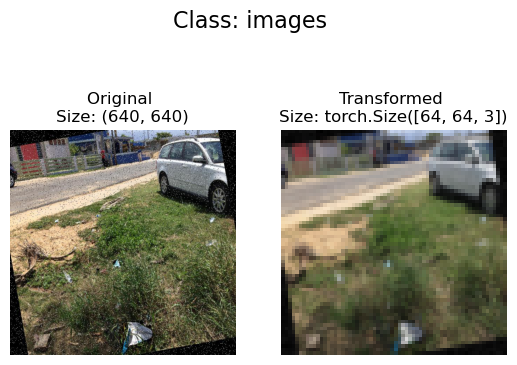

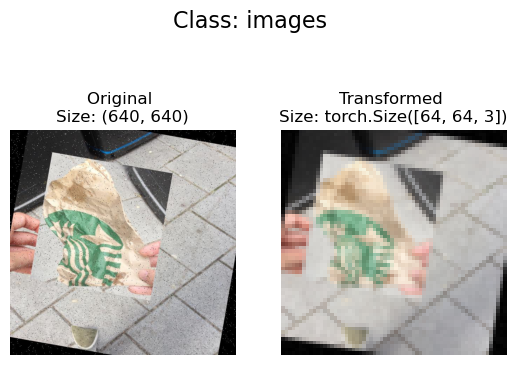

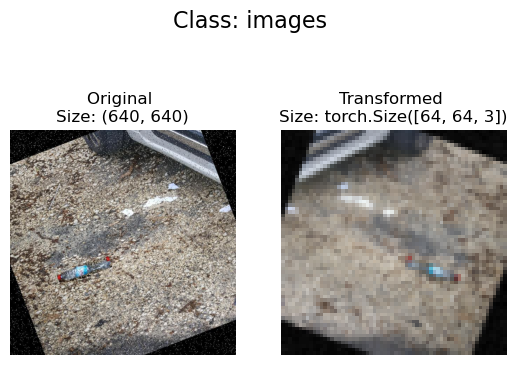

In [40]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths. 
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, 
                        transform=data_transform, 
                        n=3)


In [50]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    transforms.ColorJitter(brightness=.25, contrast=0.4, saturation=0.4, hue=0.1),
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
])

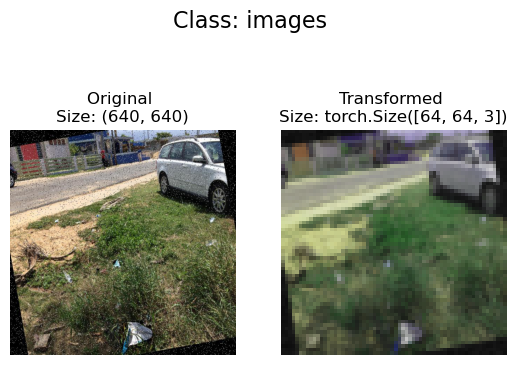

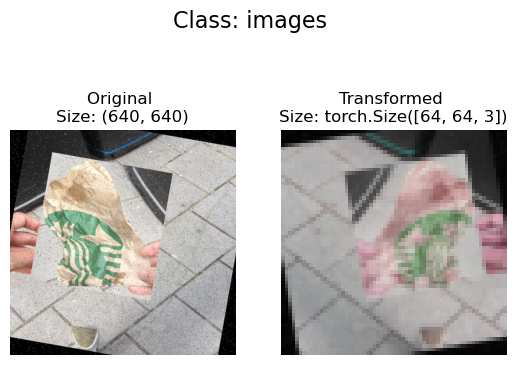

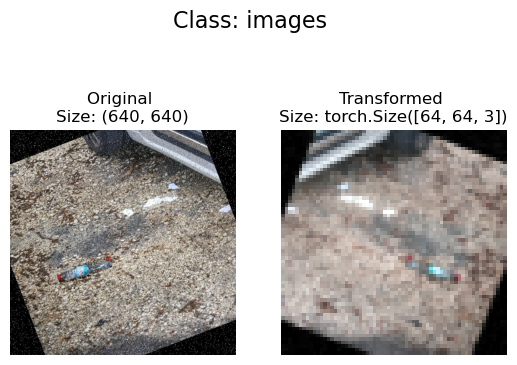

In [51]:
plot_transformed_images(image_path_list, 
                        transform=data_transform, 
                        n=3)